In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [68]:
df = pd.read_csv('bhp.csv')
df.shape

(13200, 7)

In [69]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [70]:
lower_percentile, upper_percentile = df['price_per_sqft'].quantile([0.001, 0.999])
lower_percentile, upper_percentile

(1366.184, 50959.36200000098)

In [71]:
df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)].shape

(28, 7)

In [72]:
df2 = df[(df['price_per_sqft'] > lower_percentile) & (df['price_per_sqft'] < upper_percentile)]
df2.shape

(13172, 7)

In [73]:
upper_std = df2['price_per_sqft'].mean() + 4 * df2['price_per_sqft'].std()
lower_std = df2['price_per_sqft'].mean() - 4 * df2['price_per_sqft'].std()
lower_std, upper_std

(-9900.429065502582, 23227.73653589432)

In [74]:
df2[(df2['price_per_sqft'] < lower_std) | (df2['price_per_sqft'] > upper_std)].shape

(125, 7)

In [75]:
df_std = df2[(df2['price_per_sqft'] > lower_std) & (df2['price_per_sqft'] < upper_std)]
df_std.shape

(13047, 7)

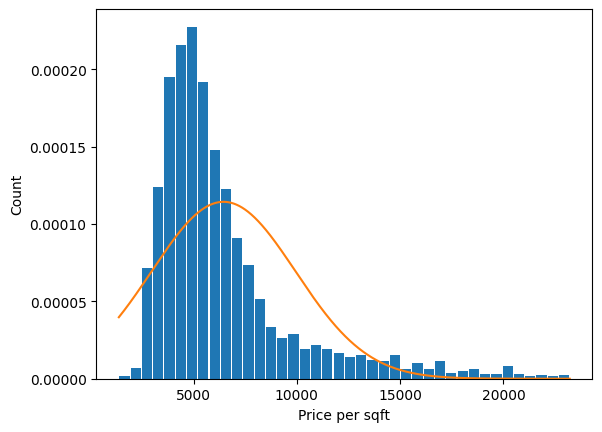

In [76]:
plt.hist(df_std['price_per_sqft'], rwidth=0.9, bins=40, density=True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

rng = np.arange(df_std['price_per_sqft'].min(), df_std['price_per_sqft'].max())
plt.plot(rng, norm.pdf(rng, df_std['price_per_sqft'].mean(), df_std['price_per_sqft'].std()))

plt.show()

In [77]:
df2['price/sqft_zscore'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean()) / df2['price_per_sqft'].std()
df2.head()

C:\Users\Vladan\AppData\Local\Temp\ipykernel_23268\1946332660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price/sqft_zscore'] = (df2['price_per_sqft'] - df2['price_per_sqft'].mean()) / df2['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,price/sqft_zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [79]:
df2[(df2['price/sqft_zscore'] > 4) | (df2['price/sqft_zscore'] < -4)].shape

(125, 8)

In [80]:
df_zscore = df2[(df2['price/sqft_zscore'] < 4) & (df2['price/sqft_zscore'] > -4)]
df_zscore.shape

(13047, 8)

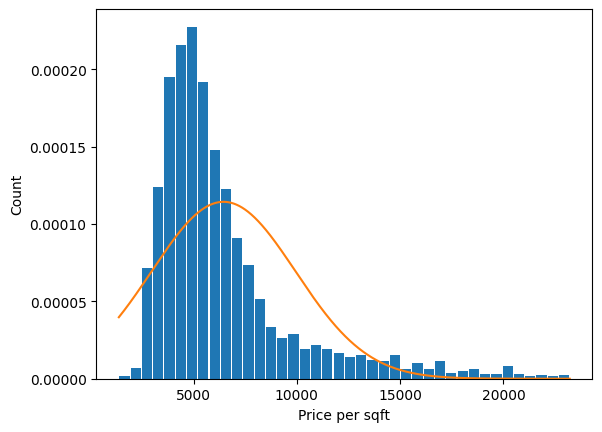

In [81]:
plt.hist(df_zscore['price_per_sqft'], rwidth=0.9, bins=40, density=True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

rng = np.arange(df_zscore['price_per_sqft'].min(), df_zscore['price_per_sqft'].max())
plt.plot(rng, norm.pdf(rng, df_zscore['price_per_sqft'].mean(), df_zscore['price_per_sqft'].std()))

plt.show()